# Set Up EfficientDet 

In [1]:
# Import necessary modules:
import sys
import os
import gdown
import cv2

In [2]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 10550, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 10550 (delta 10), reused 0 (delta 0), pack-reused 10528
Receiving objects: 100% (10550/10550), 260.87 MiB | 34.35 MiB/s, done.
Resolving deltas: 100% (4704/4704), done.
Checking out files: 100% (8428/8428), done.


In [3]:
# For colab use the command below
! cd Monk_Object_Detection/10_pytorch_efficientdet/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install
# Restart colab runtime now

# For Local systems and cloud select the right CUDA version
# ! cd Monk_Object_Detection/10_pytorch_efficientdet/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

sys.path.append("Monk_Object_Detection/10_pytorch_efficientdet/lib/")

     |████████████████████████████████| 124 kB 8.9 MB/s 
     |████████████████████████████████| 753.4 MB 6.4 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu102 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.
     |████████████████████████████████| 4.0 MB 8.4 MB/s 
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102


# Download Training/Test Data

In [4]:
# Obtain the dataset using its dowloadable public Google Drive link and unzip it. 

fileURL = 'https://drive.google.com/uc?export=download&id=1o07JIqG-3iHBoXTy2gzvZnF5qoWEUS6i'
fileOut = 'dataset.zip'
gdown.download(fileURL, fileOut, quiet=False)

!unzip dataset.zip -d dataset

Downloading...
From: https://drive.google.com/uc?export=download&id=1o07JIqG-3iHBoXTy2gzvZnF5qoWEUS6i
To: /content/dataset.zip
32.8MB [00:00, 181MB/s] 


Archive:  dataset.zip
   creating: dataset/annotations/
  inflating: dataset/annotations/instances_test.json  
  inflating: dataset/annotations/instances_train.json  
  inflating: dataset/annotations/instances_valid.json  
 extracting: dataset/annotations/labels.txt  
   creating: dataset/test/
  inflating: dataset/test/flat136.jpg  
  inflating: dataset/test/flat137.jpg  
  inflating: dataset/test/flat138.jpg  
  inflating: dataset/test/flat139.jpg  
  inflating: dataset/test/flat140.jpg  
  inflating: dataset/test/flat141.jpg  
  inflating: dataset/test/flat142.jpg  
  inflating: dataset/test/flat143.jpg  
  inflating: dataset/test/flat144.jpg  
  inflating: dataset/test/flat145.jpg  
  inflating: dataset/test/flat146.jpg  
  inflating: dataset/test/flat147.jpg  
  inflating: dataset/test/flat148.jpg  
  inflating: dataset/test/flat149.jpg  
  inflating: dataset/test/flat150.jpg  
  inflating: dataset/test/gable136.jpg  
  inflating: dataset/test/gable137.jpg  
  inflating: dataset/t

# Train a Detection Model

In [7]:
from train_detector import Detector

# User input
nEpochs = 10
classes = ["flat","gable","hip"]
root_dir = "dataset"
train_dir = "train"
val_dir = "valid"

# Create the object detector training class
gtf = Detector()

# Set the training and validation datasets
gtf.set_train_dataset(root_dir,"","",train_dir,classes_list=classes,
                      batch_size=4, num_workers=4)
gtf.set_val_dataset(root_dir,"","",val_dir)

# Define the model architecture
gtf.set_model(model_name="efficientdet-d3.pth", num_gpus=1,freeze_head=False)

# Set model hyperparameters
esEpochsNoImprovement = 5

gtf.set_hyperparams(optimizer="adamw", lr=0.001, es_min_delta=0.0,
                    es_patience=5)

# Train

gtf.train(num_epochs=nEpochs, val_interval=1, save_interval=5)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


[Warning] Ignoring Error(s) in loading state_dict for EfficientDetBackbone:
	size mismatch for classifier.header.pointwise_conv.conv.weight: copying a param with shape torch.Size([810, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([27, 160, 1, 1]).
	size mismatch for classifier.header.pointwise_conv.conv.bias: copying a param with shape torch.Size([810]) from checkpoint, the shape in current model is torch.Size([27]).
[Warning] Don't panic if you see this, this might be because you load a pretrained weights with different number of classes. The rest of the weights should be loaded already.
[Info] loaded weights: efficientdet-d3.pth, resuming checkpoint from step: 0







Running validation
Val. Epoch: 0/10. Classification loss: 6.29570. Regression loss: 0.13303. Total loss: 6.42873



Running validation
Val. Epoch: 1/10. Classification loss: 1.33018. Regression loss: 0.09793. Total loss: 1.42811



Running validation
Val. Epoch: 2/10. Classification loss: 1.21802. Regression loss: 0.09265. Total loss: 1.31067



Running validation
Val. Epoch: 3/10. Classification loss: 1.12808. Regression loss: 0.09066. Total loss: 1.21874



Running validation
Val. Epoch: 4/10. Classification loss: 1.01809. Regression loss: 0.08710. Total loss: 1.10519



Running validation
Val. Epoch: 5/10. Classification loss: 0.89818. Regression loss: 0.08215. Total loss: 0.98032



Running validation
Val. Epoch: 6/10. Classification loss: 0.86224. Regression loss: 0.07853. Total loss: 0.94077



Running validation
Val. Epoch: 7/10. Classification loss: 0.77620. Regression loss: 0.07497. Total loss: 0.85117



Running validation
Val. Epoch: 8/10. Classification loss: 0.72956. Regression loss: 0.07437. Total loss: 0.80393



Running validation
Val. Epoch: 9/10. Classification loss: 0.64355. Regression loss: 0.06904. Total loss: 0.71259


Training complete


# Use the Trained Model for Inference

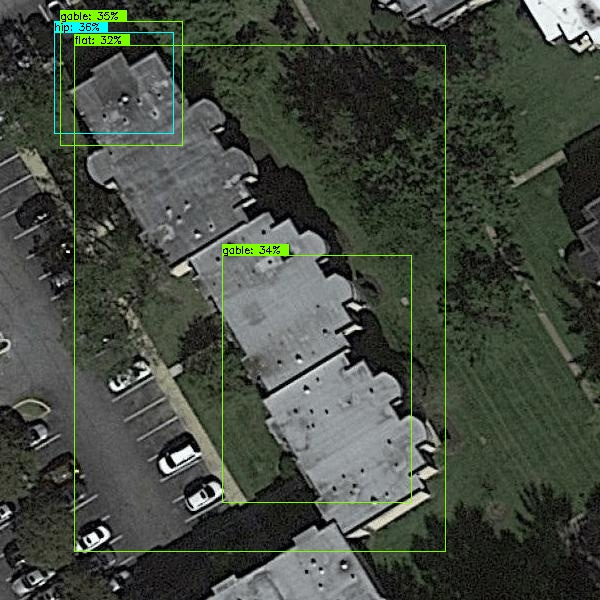

In [56]:
from infer_detector import Infer

# Create the inference class
gtf = Infer()

# Load the trained model
classes = ["flat","gable","hip"]
gtf.load_model("trained_weights/custom/efficientdet-d3_trained.pth", classes,
               use_gpu=True)

test_dir = os.path.join(root_dir,"test")
imgList = os.listdir(test_dir)

# Display bounding box predictions
img = cv2.imread(os.path.join(test_dir,imgList[1]))
cv2.imwrite("input.jpg", img)
scores, labels, boxes = gtf.predict("input.jpg", threshold=0.3)
from IPython.display import Image
Image(filename='output.jpg') 